In [3]:
import pandas as pd
import vcf
import matplotlib.pyplot as plt
import seaborn as sns

#### add ID columns
- None to all IDs

In [19]:
def vcf_to_df_1(vcf_file, min_depth=10, var_type="snp"):
    """creates pandas dataframe from the vcf file data
    ----------------
    vcf_file: str
        input vcf
    min_depth: int
        minimum depth in favour of variant, 10 by default
    var_type: str
        snp - prints information about the variants
        indel - keeps silent
    """

    vcf_reader = vcf.Reader(open(vcf_file, 'r'))
    counter_key_error = 0
    
    keys_main = ["CHROM", "POS", "REF", "ALT"]
    keys_info = ["DP", "VDB", "SGB", "RPB", "MQB", "MQSB", "BQB","MQ0F", "AC", "AN","DP4", "MQ"]
    
    vcf_data ={"CHROM": [], 
               "POS": [],
               "ID": [],
               "REF": [], 
               "ALT": [], 
               "DP": [],
               "VDB": [], 
               "SGB": [], 
               "RPB": [], 
               "MQB": [], 
               "MQSB": [], 
               "BQB": [],
               "MQ0F": [],
               "AC": [],
               "AN": [],
               "DP4": [],
               "MQ": []}
    
    for record in vcf_reader:
    
      
        vcf_data["CHROM"].append(record.CHROM)
        vcf_data["POS"].append(record.POS)
        vcf_data["ID"].append(None)
        vcf_data["REF"].append(record.REF)
        vcf_data["ALT"].append(record.ALT)
            
        for key in keys_info:
            if key in record.INFO.keys():
                vcf_data[key].append(record.INFO[key])
            else:
                vcf_data[key].append(None)

    
    
    df = pd.DataFrame.from_dict(vcf_data)
    
    print(counter_key_error)
    return df

In [20]:
df = vcf_to_df_1("./5_variants/bgi_test.vcf")

0


In [21]:
df.shape

(679895, 17)

In [22]:
df.head()

,CHROM,POS,ID,REF,ALT,DP,VDB,SGB,RPB,MQB,MQSB,BQB,MQ0F,AC,AN,DP4,MQ
0,NC_000001.10,10168,None,ct,[cTt],1,NaN,-0.379885,NaN,NaN,NaN,NaN,0.0,[2],2,"[0, 0, 1, 0]",37
1,NC_000001.10,10174,None,C,[T],1,NaN,-0.379885,NaN,NaN,NaN,NaN,0.0,[2],2,"[0, 0, 1, 0]",37
2,NC_000001.10,10185,None,C,[T],1,NaN,-0.379885,NaN,NaN,NaN,NaN,0.0,[2],2,"[0, 0, 1, 0]",37
3,NC_000001.10,10327,None,T,[C],1,NaN,-0.379885,NaN,NaN,NaN,NaN,0.0,[2],2,"[0, 0, 0, 1]",37
4,NC_000001.10,10346,None,T,[C],1,NaN,-0.379885,NaN,NaN,NaN,NaN,0.0,[2],2,"[0, 0, 0, 1]",37


In [23]:
df["DP"].describe()

count    679895.000000
mean         12.210602
std          31.573964
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max         264.000000
Name: DP, dtype: float64

In [24]:
df["DP"].value_counts()

1      291365
2      114075
3       64615
4       36482
5       20676
        ...  
264         3
257         2
256         1
260         1
263         1
Name: DP, Length: 260, dtype: int64

In [27]:
df["CHROM"].value_counts()

NC_000001.10      57792
NC_000002.11      51384
NC_000003.11      39055
NC_000004.11      38947
NC_000007.13      37076
                  ...  
NW_003871076.1        1
NW_003871058.1        1
NW_003315966.1        1
NW_003315909.1        1
NW_004070866.1        1
Name: CHROM, Length: 234, dtype: int64

In [25]:
df["DP"].value_counts(bins=20, sort=False)

(0.736, 14.15]     576567
(14.15, 27.3]       26827
(27.3, 40.45]       17501
(40.45, 53.6]       12793
(53.6, 66.75]        9544
(66.75, 79.9]        7277
(79.9, 93.05]        6125
(93.05, 106.2]       4320
(106.2, 119.35]      3353
(119.35, 132.5]      2782
(132.5, 145.65]      2333
(145.65, 158.8]      1726
(158.8, 171.95]      1532
(171.95, 185.1]      1363
(185.1, 198.25]      1013
(198.25, 211.4]       915
(211.4, 224.55]       805
(224.55, 237.7]      1006
(237.7, 250.85]      2026
(250.85, 264.0]        87
Name: DP, dtype: int64

<AxesSubplot:ylabel='DP'>

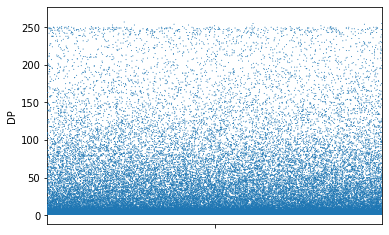

In [26]:
sns.stripplot(y=df["DP"], jitter=2, size=1)